In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from __future__ import print_function
from statsmodels.compat import lzip
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
from statsmodels.graphics.regressionplots import plot_fit
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from statsmodels.graphics.regressionplots import plot_regress_exog
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.pipeline import make_pipeline

In [3]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Lasso
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import expon

In [4]:
listings_augmented_2018 = pd.read_csv('listings_augmented_2018-05-06_V1.csv', low_memory=False)

In [5]:
listings_augmented_2018

,Unnamed: 0,house_rules-Topic0,house_rules-Topic1,house_rules-Topic2,house_rules-Topic3,house_rules-Topic4,house_rules-Topic5,house_rules-Topic6,house_rules-Topic7,house_rules-Topic8,...,"has""First Aid Kit""",hasDog(s),"has""Wireless Internet""","has""Cable TV""",hasPool,hasBreakfast,hasDoorman,"has""Lock on Bedroom Door""","has""24-Hour Check-in""",distance from ocean
0,0,0.0,0.19,0.00,0.0,0.0,0.0,0.00,0.00,0.00,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
1,1,0.0,0.00,0.12,0.0,0.0,0.0,0.00,0.00,0.10,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,14.0
2,2,0.3,0.04,0.00,0.0,0.03,0.0,0.00,0.05,0.05,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,16.0
3,3,0.01,0.49,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,16.0
4,4,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,16.0
5,5,0.01,0.57,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,16.0
6,6,0.02,0.35,0.02,0.02,0.02,0.35,0.02,0.02,0.02,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,16.0
7,7,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,16.0
8,8,0.99,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,15.0
9,9,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0


In [6]:
listings_augmented_2018['neighbourhood_cleansed']

0       Amphitheater And Water Park
1                         East Lake
2                   Eastlake Trails
3                   Eastlake Vistas
4                   Eastlake Vistas
5                   Eastlake Vistas
6                   Eastlake Vistas
7                   Eastlake Vistas
8                    Estlake Greens
9                    Estlake Greens
10                   Estlake Greens
11                   Estlake Greens
12                    Lynwood Hills
13                    Lynwood Hills
14                    Lynwood Hills
15                    Lynwood Hills
16                       Otay Ranch
17                       Otay Ranch
18                       Otay Ranch
19                       Otay Ranch
20                       Otay Ranch
21                       Otay Ranch
22                       Otay Ranch
23                       Otay Ranch
24                       Otay Ranch
25                       Otay Ranch
26                       Otay Ranch
27                       Ota

In [7]:
L = []
for w in listings_augmented_2018['neighbourhood_cleansed'].unique():
    L.append((w, listings_augmented_2018[listings_augmented_2018['neighbourhood_cleansed'] == w]['distance from ocean'].mean()))
    
L = sorted(L, key = lambda x: x[1], reverse = True)

In [8]:
df = pd.DataFrame(L, columns=['neighbourhood', 'distance from ocean'])

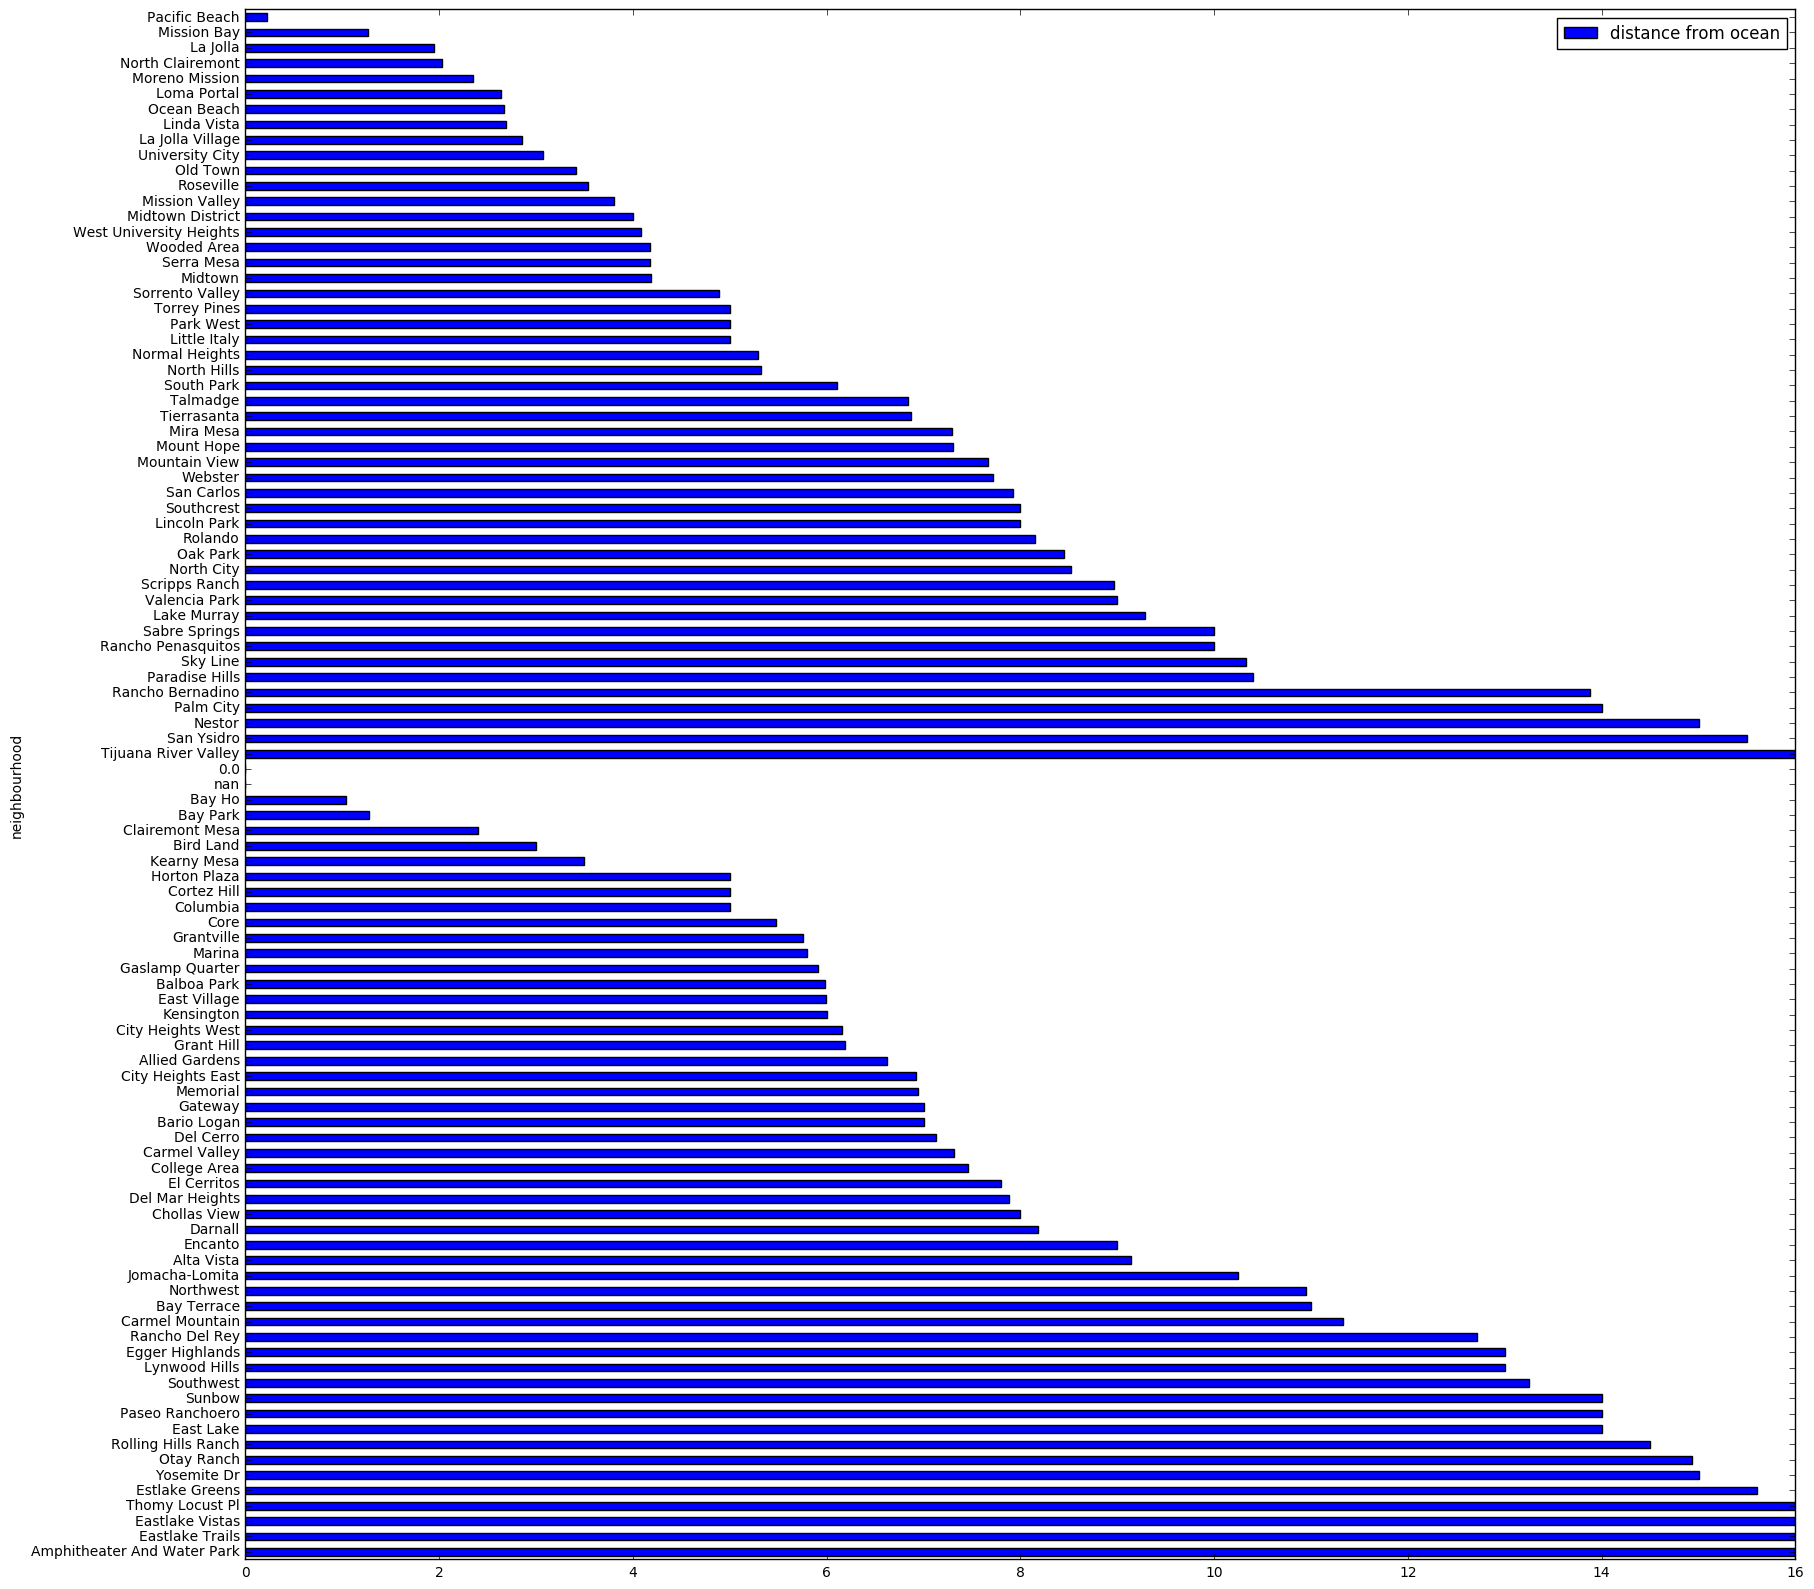

In [9]:
plt.figure()
df.plot(x='neighbourhood',y='distance from ocean', kind='barh', figsize=(20,20))
plt.show()

In [10]:
list_summ = pd.read_csv('inside_airbnb/listings_summ.csv')

In [11]:
L = []
for w in list_summ['neighbourhood'].unique():
    L.append((w, list_summ[list_summ['neighbourhood'] == w]['price'].mean()))
    
L = sorted(L, key = lambda x: x[1], reverse = True)

In [12]:
df = pd.DataFrame(L, columns=['neighbourhood', 'nbghrd_mean_price'])

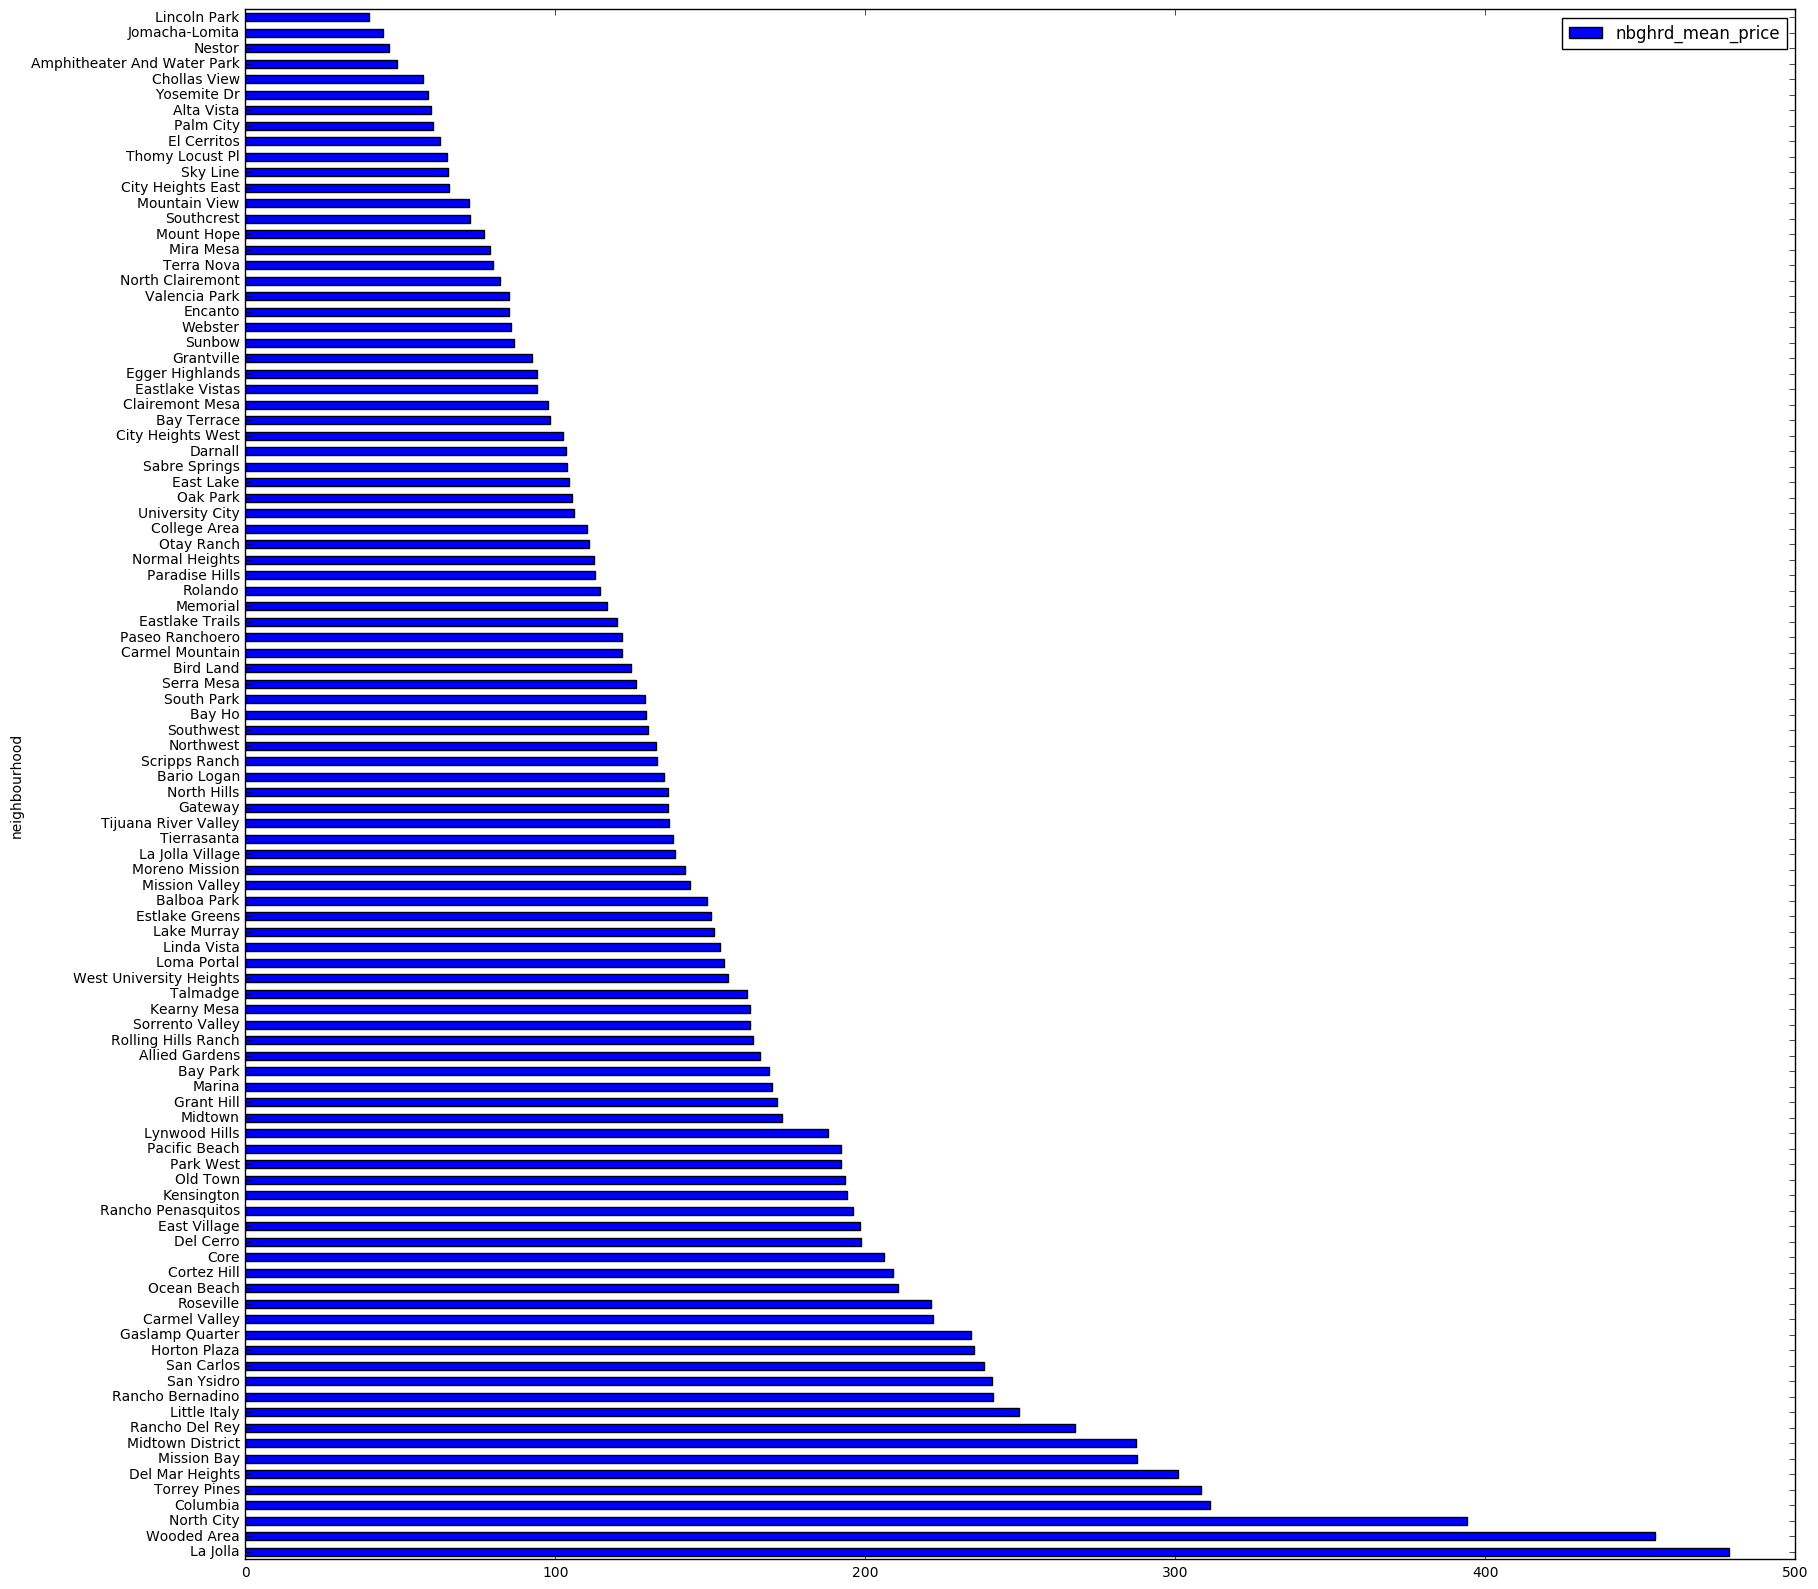

In [13]:
plt.figure()
df.plot(x='neighbourhood',y='nbghrd_mean_price', kind='barh', figsize=(20,20))
plt.show()

In [21]:
L = []
for w in listings_augmented_2018['neighbourhood_cleansed'].unique():
    L.append((w, listings_augmented_2018[listings_augmented_2018['neighbourhood_cleansed'] == w]['distance from ocean'].mean()))
    
L = sorted(L, key = lambda x: x[1], reverse = True)

In [22]:
M = []
for w in list_summ['neighbourhood'].unique():
    M.append((w, list_summ[list_summ['neighbourhood'] == w]['price'].mean()))
    
M = sorted(L, key = lambda x: x[1], reverse = True)

In [23]:
 def list_to_dict(li):  
        dct = {}  
        
        for i, j in li:  
            dct[i] = j
            
        return dct 

In [26]:
L_dict = list_to_dict(L)

In [27]:
M_dict = list_to_dict(M)

In [28]:
L_dict

{nan: nan,
 '0.0': nan,
 'Allied Gardens': 6.625,
 'Alta Vista': 9.142857142857142,
 'Amphitheater And Water Park': 16.0,
 'Balboa Park': 5.983333333333333,
 'Bario Logan': 7.0,
 'Bay Ho': 1.0384615384615385,
 'Bay Park': 1.28,
 'Bay Terrace': 11.0,
 'Bird Land': 3.0,
 'Carmel Mountain': 11.333333333333334,
 'Carmel Valley': 7.315789473684211,
 'Chollas View': 8.0,
 'City Heights East': 6.923076923076923,
 'City Heights West': 6.153846153846154,
 'Clairemont Mesa': 2.4050632911392404,
 'College Area': 7.456521739130435,
 'Columbia': 5.0,
 'Core': 5.476923076923077,
 'Cortez Hill': 5.0,
 'Darnall': 8.181818181818182,
 'Del Cerro': 7.125,
 'Del Mar Heights': 7.879310344827586,
 'East Lake': 14.0,
 'East Village': 5.995833333333334,
 'Eastlake Trails': 16.0,
 'Eastlake Vistas': 16.0,
 'Egger Highlands': 13.0,
 'El Cerritos': 7.8,
 'Encanto': 9.0,
 'Estlake Greens': 15.6,
 'Gaslamp Quarter': 5.907894736842105,
 'Gateway': 7.0,
 'Grant Hill': 6.186440677966102,
 'Grantville': 5.757575757575

In [29]:
M_dict

{nan: nan,
 '0.0': nan,
 'Allied Gardens': 6.625,
 'Alta Vista': 9.142857142857142,
 'Amphitheater And Water Park': 16.0,
 'Balboa Park': 5.983333333333333,
 'Bario Logan': 7.0,
 'Bay Ho': 1.0384615384615385,
 'Bay Park': 1.28,
 'Bay Terrace': 11.0,
 'Bird Land': 3.0,
 'Carmel Mountain': 11.333333333333334,
 'Carmel Valley': 7.315789473684211,
 'Chollas View': 8.0,
 'City Heights East': 6.923076923076923,
 'City Heights West': 6.153846153846154,
 'Clairemont Mesa': 2.4050632911392404,
 'College Area': 7.456521739130435,
 'Columbia': 5.0,
 'Core': 5.476923076923077,
 'Cortez Hill': 5.0,
 'Darnall': 8.181818181818182,
 'Del Cerro': 7.125,
 'Del Mar Heights': 7.879310344827586,
 'East Lake': 14.0,
 'East Village': 5.995833333333334,
 'Eastlake Trails': 16.0,
 'Eastlake Vistas': 16.0,
 'Egger Highlands': 13.0,
 'El Cerritos': 7.8,
 'Encanto': 9.0,
 'Estlake Greens': 15.6,
 'Gaslamp Quarter': 5.907894736842105,
 'Gateway': 7.0,
 'Grant Hill': 6.186440677966102,
 'Grantville': 5.757575757575

In [30]:
LM_dict = {}

for w in M_dict.keys():
    a = L_dict[w]
    b = M_dict[w]
    
    LM_dict[a] = b

In [31]:
L_dict

{nan: nan,
 '0.0': nan,
 'Allied Gardens': 6.625,
 'Alta Vista': 9.142857142857142,
 'Amphitheater And Water Park': 16.0,
 'Balboa Park': 5.983333333333333,
 'Bario Logan': 7.0,
 'Bay Ho': 1.0384615384615385,
 'Bay Park': 1.28,
 'Bay Terrace': 11.0,
 'Bird Land': 3.0,
 'Carmel Mountain': 11.333333333333334,
 'Carmel Valley': 7.315789473684211,
 'Chollas View': 8.0,
 'City Heights East': 6.923076923076923,
 'City Heights West': 6.153846153846154,
 'Clairemont Mesa': 2.4050632911392404,
 'College Area': 7.456521739130435,
 'Columbia': 5.0,
 'Core': 5.476923076923077,
 'Cortez Hill': 5.0,
 'Darnall': 8.181818181818182,
 'Del Cerro': 7.125,
 'Del Mar Heights': 7.879310344827586,
 'East Lake': 14.0,
 'East Village': 5.995833333333334,
 'Eastlake Trails': 16.0,
 'Eastlake Vistas': 16.0,
 'Egger Highlands': 13.0,
 'El Cerritos': 7.8,
 'Encanto': 9.0,
 'Estlake Greens': 15.6,
 'Gaslamp Quarter': 5.907894736842105,
 'Gateway': 7.0,
 'Grant Hill': 6.186440677966102,
 'Grantville': 5.757575757575

In [32]:
M_dict

{nan: nan,
 '0.0': nan,
 'Allied Gardens': 6.625,
 'Alta Vista': 9.142857142857142,
 'Amphitheater And Water Park': 16.0,
 'Balboa Park': 5.983333333333333,
 'Bario Logan': 7.0,
 'Bay Ho': 1.0384615384615385,
 'Bay Park': 1.28,
 'Bay Terrace': 11.0,
 'Bird Land': 3.0,
 'Carmel Mountain': 11.333333333333334,
 'Carmel Valley': 7.315789473684211,
 'Chollas View': 8.0,
 'City Heights East': 6.923076923076923,
 'City Heights West': 6.153846153846154,
 'Clairemont Mesa': 2.4050632911392404,
 'College Area': 7.456521739130435,
 'Columbia': 5.0,
 'Core': 5.476923076923077,
 'Cortez Hill': 5.0,
 'Darnall': 8.181818181818182,
 'Del Cerro': 7.125,
 'Del Mar Heights': 7.879310344827586,
 'East Lake': 14.0,
 'East Village': 5.995833333333334,
 'Eastlake Trails': 16.0,
 'Eastlake Vistas': 16.0,
 'Egger Highlands': 13.0,
 'El Cerritos': 7.8,
 'Encanto': 9.0,
 'Estlake Greens': 15.6,
 'Gaslamp Quarter': 5.907894736842105,
 'Gateway': 7.0,
 'Grant Hill': 6.186440677966102,
 'Grantville': 5.757575757575

In [33]:
LM_dict

{nan: nan,
 0.22597864768683273: 0.22597864768683273,
 1.0384615384615385: 1.0384615384615385,
 1.262942779291553: 1.262942779291553,
 1.28: 1.28,
 1.9462962962962962: 1.9462962962962962,
 2.025: 2.025,
 2.3529411764705883: 2.3529411764705883,
 2.4050632911392404: 2.4050632911392404,
 2.634831460674157: 2.634831460674157,
 2.6707317073170733: 2.6707317073170733,
 2.6862745098039214: 2.6862745098039214,
 2.857142857142857: 2.857142857142857,
 3.0: 3.0,
 3.0714285714285716: 3.0714285714285716,
 3.4134615384615383: 3.4134615384615383,
 3.5: 3.5,
 3.5357142857142856: 3.5357142857142856,
 3.806451612903226: 3.806451612903226,
 4.0: 4.0,
 4.08421052631579: 4.08421052631579,
 4.173913043478261: 4.173913043478261,
 4.18: 4.18,
 4.191335740072202: 4.191335740072202,
 4.888888888888889: 4.888888888888889,
 5.0: 5.0,
 5.291666666666667: 5.291666666666667,
 5.321739130434783: 5.321739130434783,
 5.476923076923077: 5.476923076923077,
 5.757575757575758: 5.757575757575758,
 5.8: 5.8,
 5.907894736842

In [39]:
P = []
for w in listings_augmented_2018['neighbourhood_cleansed'].unique():
    P.append((w, listings_augmented_2018[listings_augmented_2018['neighbourhood_cleansed'] == w]['price_y'].mean()))
    
P = sorted(L, key = lambda x: x[1], reverse = True)

In [40]:
P_dict = list_to_dict(P)

In [41]:
LP_dict = {}

for w in P_dict.keys():
    a = L_dict[w]
    b = P_dict[w]
    
    LP_dict[a] = b

In [42]:
LP_dict

{nan: nan,
 0.22597864768683273: 0.22597864768683273,
 1.0384615384615385: 1.0384615384615385,
 1.262942779291553: 1.262942779291553,
 1.28: 1.28,
 1.9462962962962962: 1.9462962962962962,
 2.025: 2.025,
 2.3529411764705883: 2.3529411764705883,
 2.4050632911392404: 2.4050632911392404,
 2.634831460674157: 2.634831460674157,
 2.6707317073170733: 2.6707317073170733,
 2.6862745098039214: 2.6862745098039214,
 2.857142857142857: 2.857142857142857,
 3.0: 3.0,
 3.0714285714285716: 3.0714285714285716,
 3.4134615384615383: 3.4134615384615383,
 3.5: 3.5,
 3.5357142857142856: 3.5357142857142856,
 3.806451612903226: 3.806451612903226,
 4.0: 4.0,
 4.08421052631579: 4.08421052631579,
 4.173913043478261: 4.173913043478261,
 4.18: 4.18,
 4.191335740072202: 4.191335740072202,
 4.888888888888889: 4.888888888888889,
 5.0: 5.0,
 5.291666666666667: 5.291666666666667,
 5.321739130434783: 5.321739130434783,
 5.476923076923077: 5.476923076923077,
 5.757575757575758: 5.757575757575758,
 5.8: 5.8,
 5.907894736842